In [41]:
%env PGE_DB_NAME = pgequity
%env PGE_DB_USER = pgequity
%env PGE_DB_PASSWORD = pgequity
%env PGE_DB_HOST = localhost
%env PGE_DB_PORT = 5432

%env KERAS_BACKEND = torch

env: PGE_DB_NAME=pgequity
env: PGE_DB_USER=pgequity
env: PGE_DB_PASSWORD=pgequity
env: PGE_DB_HOST=localhost
env: PGE_DB_PORT=5432
env: KERAS_BACKEND=torch


In [42]:
# import torch
import pandas as pd
import numpy as np
from pynoahfunc.processor import Processor
import keras

import seaborn as sns
import matplotlib.pyplot as plt

#set torch device to cpu


In [43]:
class DataSplitter:
    def __init__(self, df : pd.DataFrame, target_col : str, init_size : int, window_size : int):
        self._input_df = df.loc[:, df.columns != target_col]
        self._target_df = df[target_col]
        self._init_size = init_size
        self._window_size = window_size

    def __iter__(self):
        self._curr_idx = self._init_size
        return self
    

    def __next__(self):
        if self._curr_idx + self._window_size >= len(self._input_df):
            raise StopIteration

        test_target = self._target_df[self._curr_idx+self._window_size]

        #if test_target is empty or Nan then stop iteration
        train_input = []
        train_target = []

        for i in range(0, self._curr_idx):
            train_input.append(self._input_df[i:i+self._window_size].values)
            train_target.append(self._target_df[i+self._window_size])

        test_input = self._input_df[self._curr_idx:self._curr_idx+self._window_size].values

        self._curr_idx += 1

        return train_input, [test_input], train_target, [test_target]
    

(1390, 50, 50)
Epoch 1/50


/var/folders/fz/_rklw_6153n8xk9ln7n4prjc0000gn/T/ipykernel_39854/1944627977.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_target = self._target_df[self._curr_idx+self._window_size]
/var/folders/fz/_rklw_6153n8xk9ln7n4prjc0000gn/T/ipykernel_39854/1944627977.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_target.append(self._target_df[i+self._window_size])


44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - loss: 0.0782 - mse: 0.0782
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0114 - mse: 0.0114
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0111 - mse: 0.0111
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - loss: 0.0103 - mse: 0.0103
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0096 - mse: 0.0096
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0093 - mse: 0.0093
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0105 - mse: 0.0105
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0094 - mse: 0.0094
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0099 - mse: 0.0099
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0106 - mse: 0.0106
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0097 - mse: 0.0097
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0101 - mse: 0.0101
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━

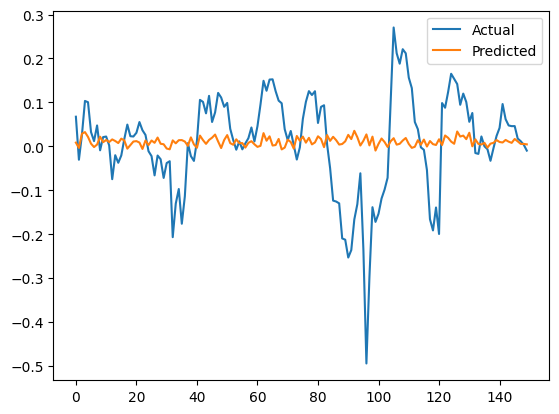

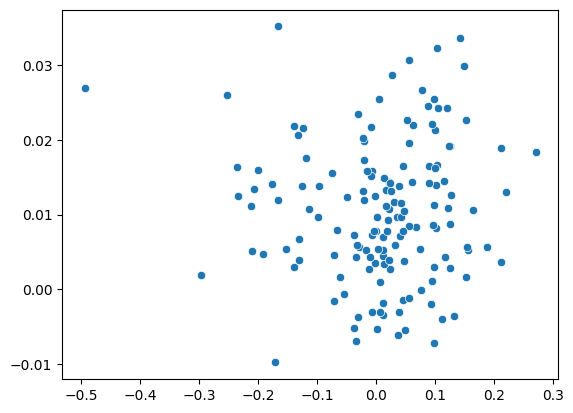

In [ ]:
FUNCTIONS = [
    "QUANTILE_RATIO(C(DGS5),89,0.10,0.90)",
    "RAVG_MEDIAN(L(EURSEKX),8)",
    "RAVG_MEDIAN(C(THREEFYTP3),55)",
    "RAVGS_RATIO(C(DFII30),3,13)",
    "RSEMS_RATIO(C(DEXHKUS),8,8)",
    "RAVG_MEDIAN(V(IAU),34)",
    "RATIO_TO_RAVG(O(IDXT100),34)",
    "RAVGS_RATIO(H(CPER),34,21)",
    "RATIO_TO_RAVG(C(BAMLC0A0CM),21)",
    "RATIO_TO_RAVG(L(CPER),21)",
    "RENTROPY(V(EURGBPX),21)",
    "RATIO_TO_RLINEAR(O(IAU),5)",
    "RKURT(V(IDXVIX),233)",
    "QUANTILE_RATIO(O(PHPX),34,0.25,0.75)",
    "RSI(O(IDXAX),34)",
    "QUANTILE_RATIO(O(IAU),55,0.25,0.75)",
    "RATIO_TO_RAVG(L(EURJPYX),55)",
    "RSEMS_RATIO(H(IDXRUT),144,55)",
    "RENTROPY(V(EURCADX),144)",
    "RAVG_MEDIAN(O(GBPUSDX),5)",
    "RAVGS_RATIO(H(SLV),89,89)",
    "STOCH_OSC_RAVG(AGGDIDL,233,89)",
    "RATIO_TO_RAVG(C(DFF),5)",
    "RSKEW(C(GVZCLS),8)",
    "RAVGS_RATIO(L(CNYX),3,13)",
    "RSI(H(CPER),21)",
    "RENTROPY(V(IDXFCHI),89)",
    "STOCH_OSC_RAVG(TQQQ,21,89)",
    "RENTROPY(L(SPXL),233)",
    "RAVGS_RATIO(C(THREEFYTP7),8,89)",
    "QUANTILE_RATIO(L(IDXFCHI),8,0.25,0.75)",
    "RENTROPY(H(NZDUSDX),5)",
    "RAVG_MEDIAN(O(AGGDIDG),3)",
    "RSI(L(SGDX),233)",
    "QUANTILE_RATIO(V(NZDUSDX),8,0.10,0.90)",
    "RAVGS_RATIO(C(DEXTAUS),13,3)",
    "STOCH_OSC_RAVG(SLV,5,21)",
    "QUANTILE_RATIO(V(IDXAORD),8,0.25,0.75)",
    "RATIO_TO_RAVG(C(IDXFTSE),8)",
    "RAVG_MEDIAN(C(BAMLHE00EHYITRIV),34)",
    "QUANTILE_RATIO(H(EURHUFX),13,0.10,0.90)",
    "RSKEW(C(IUDSOIA),5)",
    "MACDFAST(O(NZDUSDX))",
    "QUANTILE_RATIO(C(AGGDG),144,0.25,0.75)",
    "STOCH_OSC_RAVG(SLV,55,8)",
    "MACDFAST(L(EURJPYX))",
    "W_VOL_AVG(IDXNYA,13,5)",
    "RATIO_TO_RLINEAR(H(IDXBFX),5)",
    "W_VOL_AVG(AGGDIDL,13,144)",
    "RSKEW(C(THREEFF10),3)",
]

TARGET_FUNCTION = "FUTURE_PERCENT_PROFIT(TQQQ,10)"

df = Processor().process("|".join(FUNCTIONS), autoscale = True, scale_type = "robust")
dftarg = Processor().process(TARGET_FUNCTION, autoscale = False)

df = pd.merge(df, dftarg, left_index=True, right_index=True)

df.dropna(inplace=True)

#change FUTURE_PERCENT_PROFIT(TQQQ,2) to binary value
# df[TARGET_FUNCTION] = df[TARGET_FUNCTION].apply(lambda x: 1 if x > 0 else 0)

SPLIT_COUNT = 50

splitter = DataSplitter(df, TARGET_FUNCTION, len(df) - 200, SPLIT_COUNT)

siter = iter(splitter)

model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(len(FUNCTIONS), SPLIT_COUNT, 1)),
        keras.layers.Conv2D(256, (10,10), activation="tanh"),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation="tanh"),
        keras.layers.Dense(128, activation="tanh"),
        keras.layers.Dense(64, activation="tanh"),
        keras.layers.Dense(32, activation="sigmoid"),
        keras.layers.Dense(1, activation="tanh")
    ]
)

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss = "mse", metrics = ["mse"])

actuals = []
predictions = []

for train_input, test_input, train_target, test_target in siter:

    train_input = np.array(train_input)
    train_target = np.array(train_target)

    #add column to train_target that is the opposite of the target
    # train_target = np.array([[1,0] if x == 0 else [0,1] for x in train_target])

    print(train_input.shape)

    model.fit(train_input, train_target, epochs = 50)

    test_input = np.array(test_input)
    test_target = np.array(test_target)

    # test_target = np.array([[1,0] if x == 0 else [0,1] for x in test_target])

    test_loss, test_acc = model.evaluate(test_input, test_target)

    actuals.append(test_target[0])
    predictions.append(model.predict(test_input)[0][0])

    print(f"Expected {test_target[0]}, got {model.predict(test_input)[0]}")

#print confusion matrix
actuals = np.array(actuals)
predictions = np.array(predictions)


sns.lineplot(x = range(0, len(actuals)), y = actuals, label = "Actual")
sns.lineplot(x = range(0, len(predictions)), y = predictions, label = "Predicted")
plt.show()

sns.scatterplot(x = actuals, y = predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()




